In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats
import pickle
%matplotlib inline

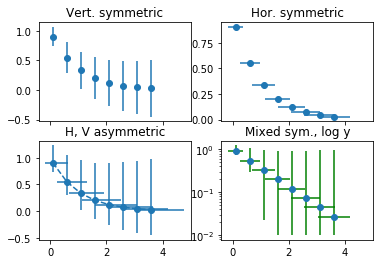

In [6]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr


fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')
ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')
ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

In [20]:
ssim = np.load('../ssiml2.np.npy')
ssim.shape

(100, 100, 15)

In [54]:
data = pickle.load(open('../ssim_pt.pkl', 'rb'))['ssim']
data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))


confidence=0.95
a=data
n = len(a)
m, se = np.mean(a), scipy.stats.sem(a)
h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
h

array([ 0.00100662,  0.00118629,  0.00158298,  0.0016588 ,  0.00173809,
        0.0017725 ,  0.0018736 ,  0.00187486,  0.00184988,  0.00186919,
        0.00191862,  0.00196405,  0.00194348,  0.00188803,  0.00185157])

<Container object of 3 artists>

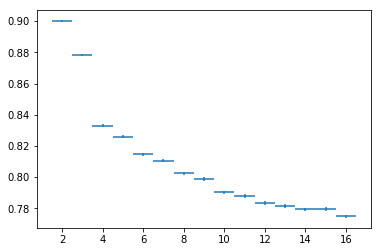

In [51]:
plt.errorbar(range(2,17), data.mean(0), xerr=0.5, yerr=h, linestyle='')
#plt.fill_between(range(2,17),ssim1.mean(0) - ssim1.std(0), ssim1.mean(0) + ssim1.std(0), facecolor='gray', alpha=0.3)

<Container object of 3 artists>

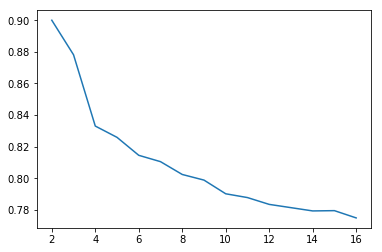

In [69]:
_mean = [0.89997738, 0.8781281,  0.83303099, 0.82587752, 0.81451337, 0.81050097, 0.80238572, 0.7988303, 0.79016653, 0.78777088, 0.78345814, 0.78139441, 0.77932033, 0.77949649, 0.77489749]
_max = [0.98815721, 0.98698728, 0.98088924, 0.98386883, 0.98327309, 0.98350944, 0.98633104, 0.98650969, 0.98153765, 0.98071394, 0.97990713, 0.97384287, 0.97898474, 0.97798077, 0.97281259]
_min= [0.65827798, 0.65241837, 0.48306758, 0.47016768, 0.4789048,  0.47672782, 0.44659716, 0.43868627, 0.42246229, 0.41717292, 0.41436968, 0.39805893, 0.37702666, 0.41953041, 0.39947656]
plt.errorbar(range(2,17), _mean)# , yerr=[_max, _min])
#plt.fill_between(range(2,17),_max, _min)

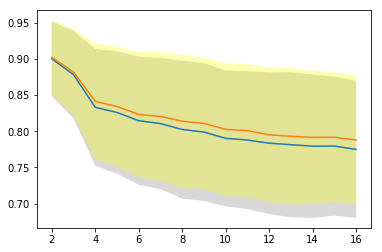

In [90]:
import pickle
f=open('../ssim_pt.pkl', 'rb')
a=pickle.load(f)
b = np.reshape(a['ssim'], (30000, 15))
plt.errorbar(range(2,17), b.mean(0), label='pretrained')
plt.fill_between(range(2,17),b.mean(0) - b.std(0), b.mean(0) + b.std(0), facecolor='gray', alpha=0.3)


plt.errorbar(range(2,17), ssim1.mean(0), label='hlm')
plt.fill_between(range(2,17),ssim1.mean(0) - ssim1.std(0), ssim1.mean(0) + ssim1.std(0), facecolor='yellow', alpha=0.3)

#plt.savefig()

# SSIM

(2000, 28)
[ 0.90852203  0.89292554  0.84951964  0.84136534  0.82064603  0.81631308
  0.80833646  0.80323717  0.79231973  0.7893186   0.78593691  0.78248854
  0.77995379  0.77890663  0.77287852  0.77221892  0.77560004  0.7755581
  0.77114279  0.76963253  0.77035721  0.76932534  0.76967112  0.76785219
  0.76570212  0.7650247   0.76305214  0.76167864]
(100, 20, 28)
[ 0.87074812  0.84476773  0.83018961  0.82247081  0.81411487  0.80850161
  0.80131141  0.79775812  0.79129407  0.78873868  0.78394832  0.78112717
  0.77651285  0.77607906  0.76978445  0.76829166  0.76912654  0.77006234
  0.77042388  0.76892784  0.76768256  0.76731498  0.7654458   0.76453142
  0.76551087  0.76455137  0.76301445  0.76208108]
(100, 20, 28)
[ 0.91099657  0.89500905  0.84745188  0.83943322  0.82025876  0.81634095
  0.80607936  0.8012068   0.79252199  0.7905561   0.78699174  0.78395758
  0.78087976  0.78085162  0.77600467  0.77529816  0.77994386  0.77988378
  0.77496329  0.77368359  0.7738296   0.77272203  0.7720480

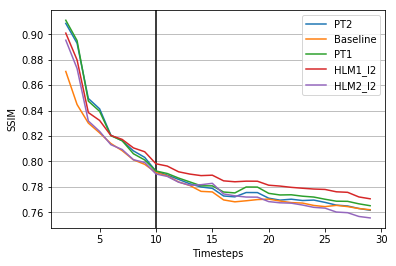

In [4]:
def getci(data):
    n = len(data)
    se = scipy.stats.sem(data)
    confidence = 0.95
    h = se * sp.stats.t._ppf((1+confidence)/2, n-1)
    return h

def plotfigs(fnames, labels, _type='ssim'):
    for e, fname in enumerate(fnames):
        data = pickle.load(open(fname, 'rb'))[_type]
        print(data.shape)
        if len(data.shape) > 2:
            data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
        _mean = data.mean(0)        
        print(_mean)        
#         ci = getci(data)
        plt.errorbar(range(2,data.shape[1]+2), _mean, label=labels[e])
#         plt.fill_between(range(2,data.shape[1]+2), _mean - ci, _mean + ci, facecolor='black', alpha=0.3)


    data = pickle.load(open('newhlm5contlr.pkl', 'rb'))['ssim']
    if len(data.shape) > 2:
        data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
    _mean = data.mean(0)        
    print(_mean)    
    plt.errorbar(range(2,data.shape[1]+2), _mean, label='HLM1_l2')
    
    data = pickle.load(open('newhlm6cont.pkl', 'rb'))['ssim']
    if len(data.shape) > 2:
        data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
    _mean = data.mean(0)        
    print(_mean)    
    plt.errorbar(range(2,data.shape[1]+2), _mean, label='HLM2_l2')



    plt.legend(loc='upper right')
    plt.gca().yaxis.grid(True)
    #plt.ylabel(_type)
    plt.ylabel("SSIM")
    plt.xlabel("Timesteps")
    plt.axvline(x=10, color='k')
    #plt.show()
    plt.savefig('ssim1.png')
plotfigs(['masked_pt_l1_1.pkl', '../cimsgens/bairfilter1/stats.pkl', 'pretrained_masked.pkl'],
             ['PT2', 'Baseline', 'PT1'])
# plotfigs(['masked_pt_l1_1.pkl',  'pretrained.pkl', 'pretrained_masked.pkl'], 
#          ['PT2', 'Baseline', 'PT1'], 'ssim_l1')

# PSNR

(2000, 28)
[ 22.65323737  21.63321738  19.30780202  18.84772709  17.76565832
  17.60928366  17.28149114  17.11721522  16.70734577  16.62973131
  16.63712289  16.54173908  16.45760229  16.38974222  16.15384854
  16.17419067  16.26967442  16.29385831  16.13647147  16.11084703
  16.13433022  16.11038054  16.14269357  16.07848455  15.95907299
  15.94695121  15.98074756  15.96452342]
(100, 20, 28)
[ 22.98381077  21.93714121  18.83885292  18.42604143  17.6826421
  17.54804372  17.23369141  17.13638196  16.82324006  16.74694873
  16.54699242  16.49743209  16.42098307  16.3993123   16.20102895
  16.16937306  16.21247735  16.18715146  16.15644584  16.11510542
  16.15039143  16.09945394  16.04929403  16.01549887  16.00986904
  16.02166837  15.98890235  15.94148386]
(100, 20, 28)
[ 22.83202753  21.78611387  19.26274571  18.8489848   17.8030282
  17.65498725  17.229954    17.06524851  16.79331898  16.77085698
  16.72557071  16.62158179  16.55946828  16.57441279  16.38413104
  16.38414006  16.59012

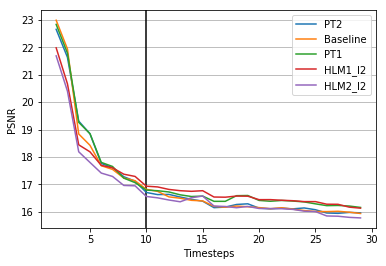

In [123]:
def getci(data):
    n = len(data)
    se = scipy.stats.sem(data)
    confidence = 0.95
    h = se * sp.stats.t._ppf((1+confidence)/2, n-1)
    return h

def plotfigs(fnames, labels, _type='ssim'):
    for e, fname in enumerate(fnames):
        data = pickle.load(open(fname, 'rb'))[_type]
        print(data.shape)
        if len(data.shape) > 2:
            data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
        _mean = data.mean(0)        
        print(_mean)        
#         ci = getci(data)
        plt.errorbar(range(2,data.shape[1]+2), _mean, label=labels[e])
#         plt.fill_between(range(2,data.shape[1]+2), _mean - ci, _mean + ci, facecolor='black', alpha=0.3)


    data = pickle.load(open('newhlm5contlr.pkl', 'rb'))['psnr']
    if len(data.shape) > 2:
        data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
    _mean = data.mean(0)        
    print(_mean)    
    plt.errorbar(range(2,data.shape[1]+2), _mean, label='HLM1_l2')
    
    data = pickle.load(open('newhlm6cont.pkl', 'rb'))['psnr']
    if len(data.shape) > 2:
        data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
    _mean = data.mean(0)        
    print(_mean)    
    plt.errorbar(range(2,data.shape[1]+2), _mean, label='HLM2_l2')



    plt.legend(loc='upper right')
    plt.gca().yaxis.grid(True)
    #plt.ylabel(_type)
    plt.ylabel("PSNR")
    plt.xlabel("Timesteps")
    plt.axvline(x=10, color='k')
    #plt.show()
    plt.savefig('psnr1.png')
# plotfigs(['masked_pt_l1_1.pkl', 'pretrained.pkl', 'pretrained_masked.pkl'],
#              ['PT2', 'Baseline', 'PT1'])
plotfigs(['masked_pt_l1_1.pkl',  'pretrained.pkl', 'pretrained_masked.pkl'], 
         ['PT2', 'Baseline', 'PT1'], 'ssim_l1')

In [127]:
def plotfigsintra(fnames, labels, _types=['ssim']):
    for _, fname in enumerate(fnames):
        print(fname)
        alldata = pickle.load(open(fname, 'rb'))
        for e, _t in enumerate(_types):
            data = alldata[_t]
            print(data.shape)
            if len(data.shape) > 2:
                data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
            _mean = data.mean(0)        
            plt.errorbar(range(2,data.shape[1]+2), _mean, label=labels[_][e])

    plt.legend(loc='upper right')
    plt.gca().yaxis.grid(True)
#     plt.ylabel(_type)
    plt.xlabel("Timstemps")
    plt.axvline(x=10, color='k')
    plt.show()



newhlm5contlr.pkl
(100, 20, 28)
(100, 20, 28)
newhlm6cont.pkl
(100, 20, 28)
(100, 20, 28)


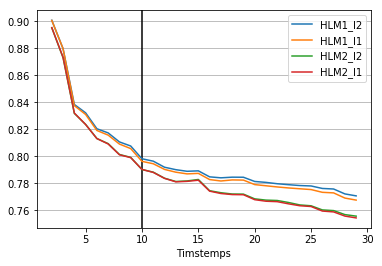

newhlm5contlr.pkl
(100, 20, 28)
(100, 20, 28)
newhlm6cont.pkl
(100, 20, 28)
(100, 20, 28)


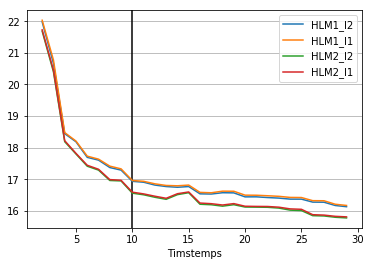

In [129]:
plotfigsintra(['newhlm5contlr.pkl', 'newhlm6cont.pkl'], [['HLM1_l2', 'HLM1_l1'], ['HLM2_l2', 'HLM2_l1']], ['ssim', 'ssim_l1'])
plotfigsintra(['newhlm5contlr.pkl', 'newhlm6cont.pkl'], [['HLM1_l2', 'HLM1_l1'], ['HLM2_l2', 'HLM2_l1']],  ['psnr', 'psnr_l1'])


(100, 20, 28)
(100, 28)
(100, 28)


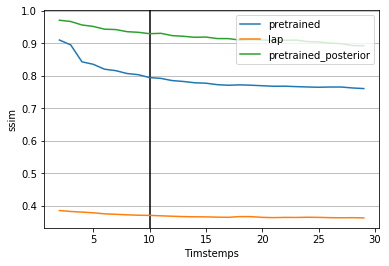

(100, 20, 28)
(100, 28)
(100, 28)


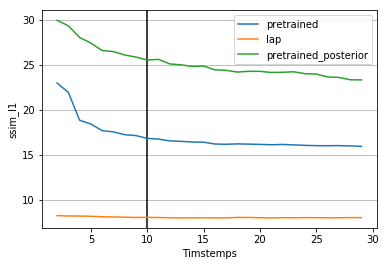

In [101]:
plotfigs(['pretrained.pkl', 'origvgglap.pkl', 'pretrained_posterior.pkl'], ['pretrained', 'lap', 'pretrained_posterior'])
plotfigs(['pretrained.pkl', 'origvgglap.pkl', 'pretrained_posterior.pkl'], ['pretrained', 'lap', 'pretrained_posterior'], 'ssim_l1')

(100, 20, 28)
(100, 20, 10)


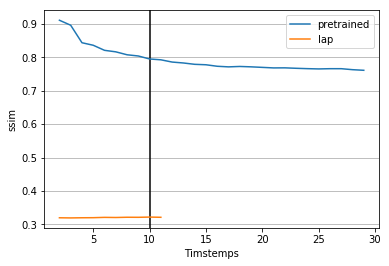

(100, 20, 28)
(100, 20, 10)


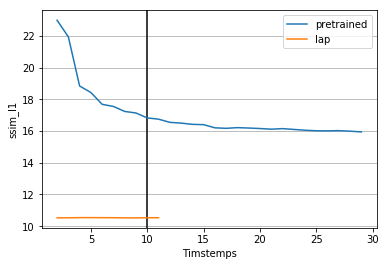

In [102]:
plotfigs(['pretrained.pkl', 'highcapunilstmkl.pkl'], ['pretrained', 'lap'])
plotfigs(['pretrained.pkl', 'highcapunilstmkl.pkl'], ['pretrained', 'lap'], 'ssim_l1')
